# Кластеризация & классификация пингвинов Антарктиды

## Подключение модулей

In [1037]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [1040]:
dataset = pd.read_csv('penguins_size.csv', sep = ',')

## Просмотр набора данных

In [1043]:
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Описание данных

Признаки:
- species – вид пингвина
- island – место обитания
- culmen_length_mm – длина клюва
- culmen_depth_mm – ширина клюва
- flipper_length_mm – длина крыльев
- body_mass_g – вес(масса) 
- sex – пол

## Анализ и распределение данных. Идентификация корреляций между переменными.

In [1047]:
dataset.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [1049]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [1051]:
dataset.shape

(344, 7)

In [1053]:
for col in dataset.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, dataset[col].isna().sum()))

Кол-во пропусков в колонке species = 0
Кол-во пропусков в колонке island = 0
Кол-во пропусков в колонке culmen_length_mm = 2
Кол-во пропусков в колонке culmen_depth_mm = 2
Кол-во пропусков в колонке flipper_length_mm = 2
Кол-во пропусков в колонке body_mass_g = 2
Кол-во пропусков в колонке sex = 10


In [1055]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [1057]:
dataset.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [1059]:
dataset.duplicated().sum()

0

In [1061]:
dataset['sex'] = dataset['sex'].map({'MALE':0, 'FEMALE':1})
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0.0


In [1063]:
dataset['species'] = dataset['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,0.0
1,0,Torgersen,39.5,17.4,186.0,3800.0,1.0
2,0,Torgersen,40.3,18.0,195.0,3250.0,1.0
4,0,Torgersen,36.7,19.3,193.0,3450.0,1.0
5,0,Torgersen,39.3,20.6,190.0,3650.0,0.0


In [1065]:
dataset['island'] = dataset['island'].map({'Torgersen':0, 'Biscoe':1, 'Dream':2})
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0.0
1,0,0,39.5,17.4,186.0,3800.0,1.0
2,0,0,40.3,18.0,195.0,3250.0,1.0
4,0,0,36.7,19.3,193.0,3450.0,1.0
5,0,0,39.3,20.6,190.0,3650.0,0.0


In [1067]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [1069]:
dataset.shape

(333, 7)

In [1071]:
dataset.reset_index(inplace = True, drop=True)
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0.0
1,0,0,39.5,17.4,186.0,3800.0,1.0
2,0,0,40.3,18.0,195.0,3250.0,1.0
3,0,0,36.7,19.3,193.0,3450.0,1.0
4,0,0,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...,...,...
328,2,1,47.2,13.7,214.0,4925.0,1.0
329,2,1,46.8,14.3,215.0,4850.0,1.0
330,2,1,50.4,15.7,222.0,5750.0,0.0
331,2,1,45.2,14.8,212.0,5200.0,1.0


In [1073]:
#hitmap_dataset = dataset.iloc[:, 2:]
hitmap_dataset = dataset
hitmap_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 18.3 KB


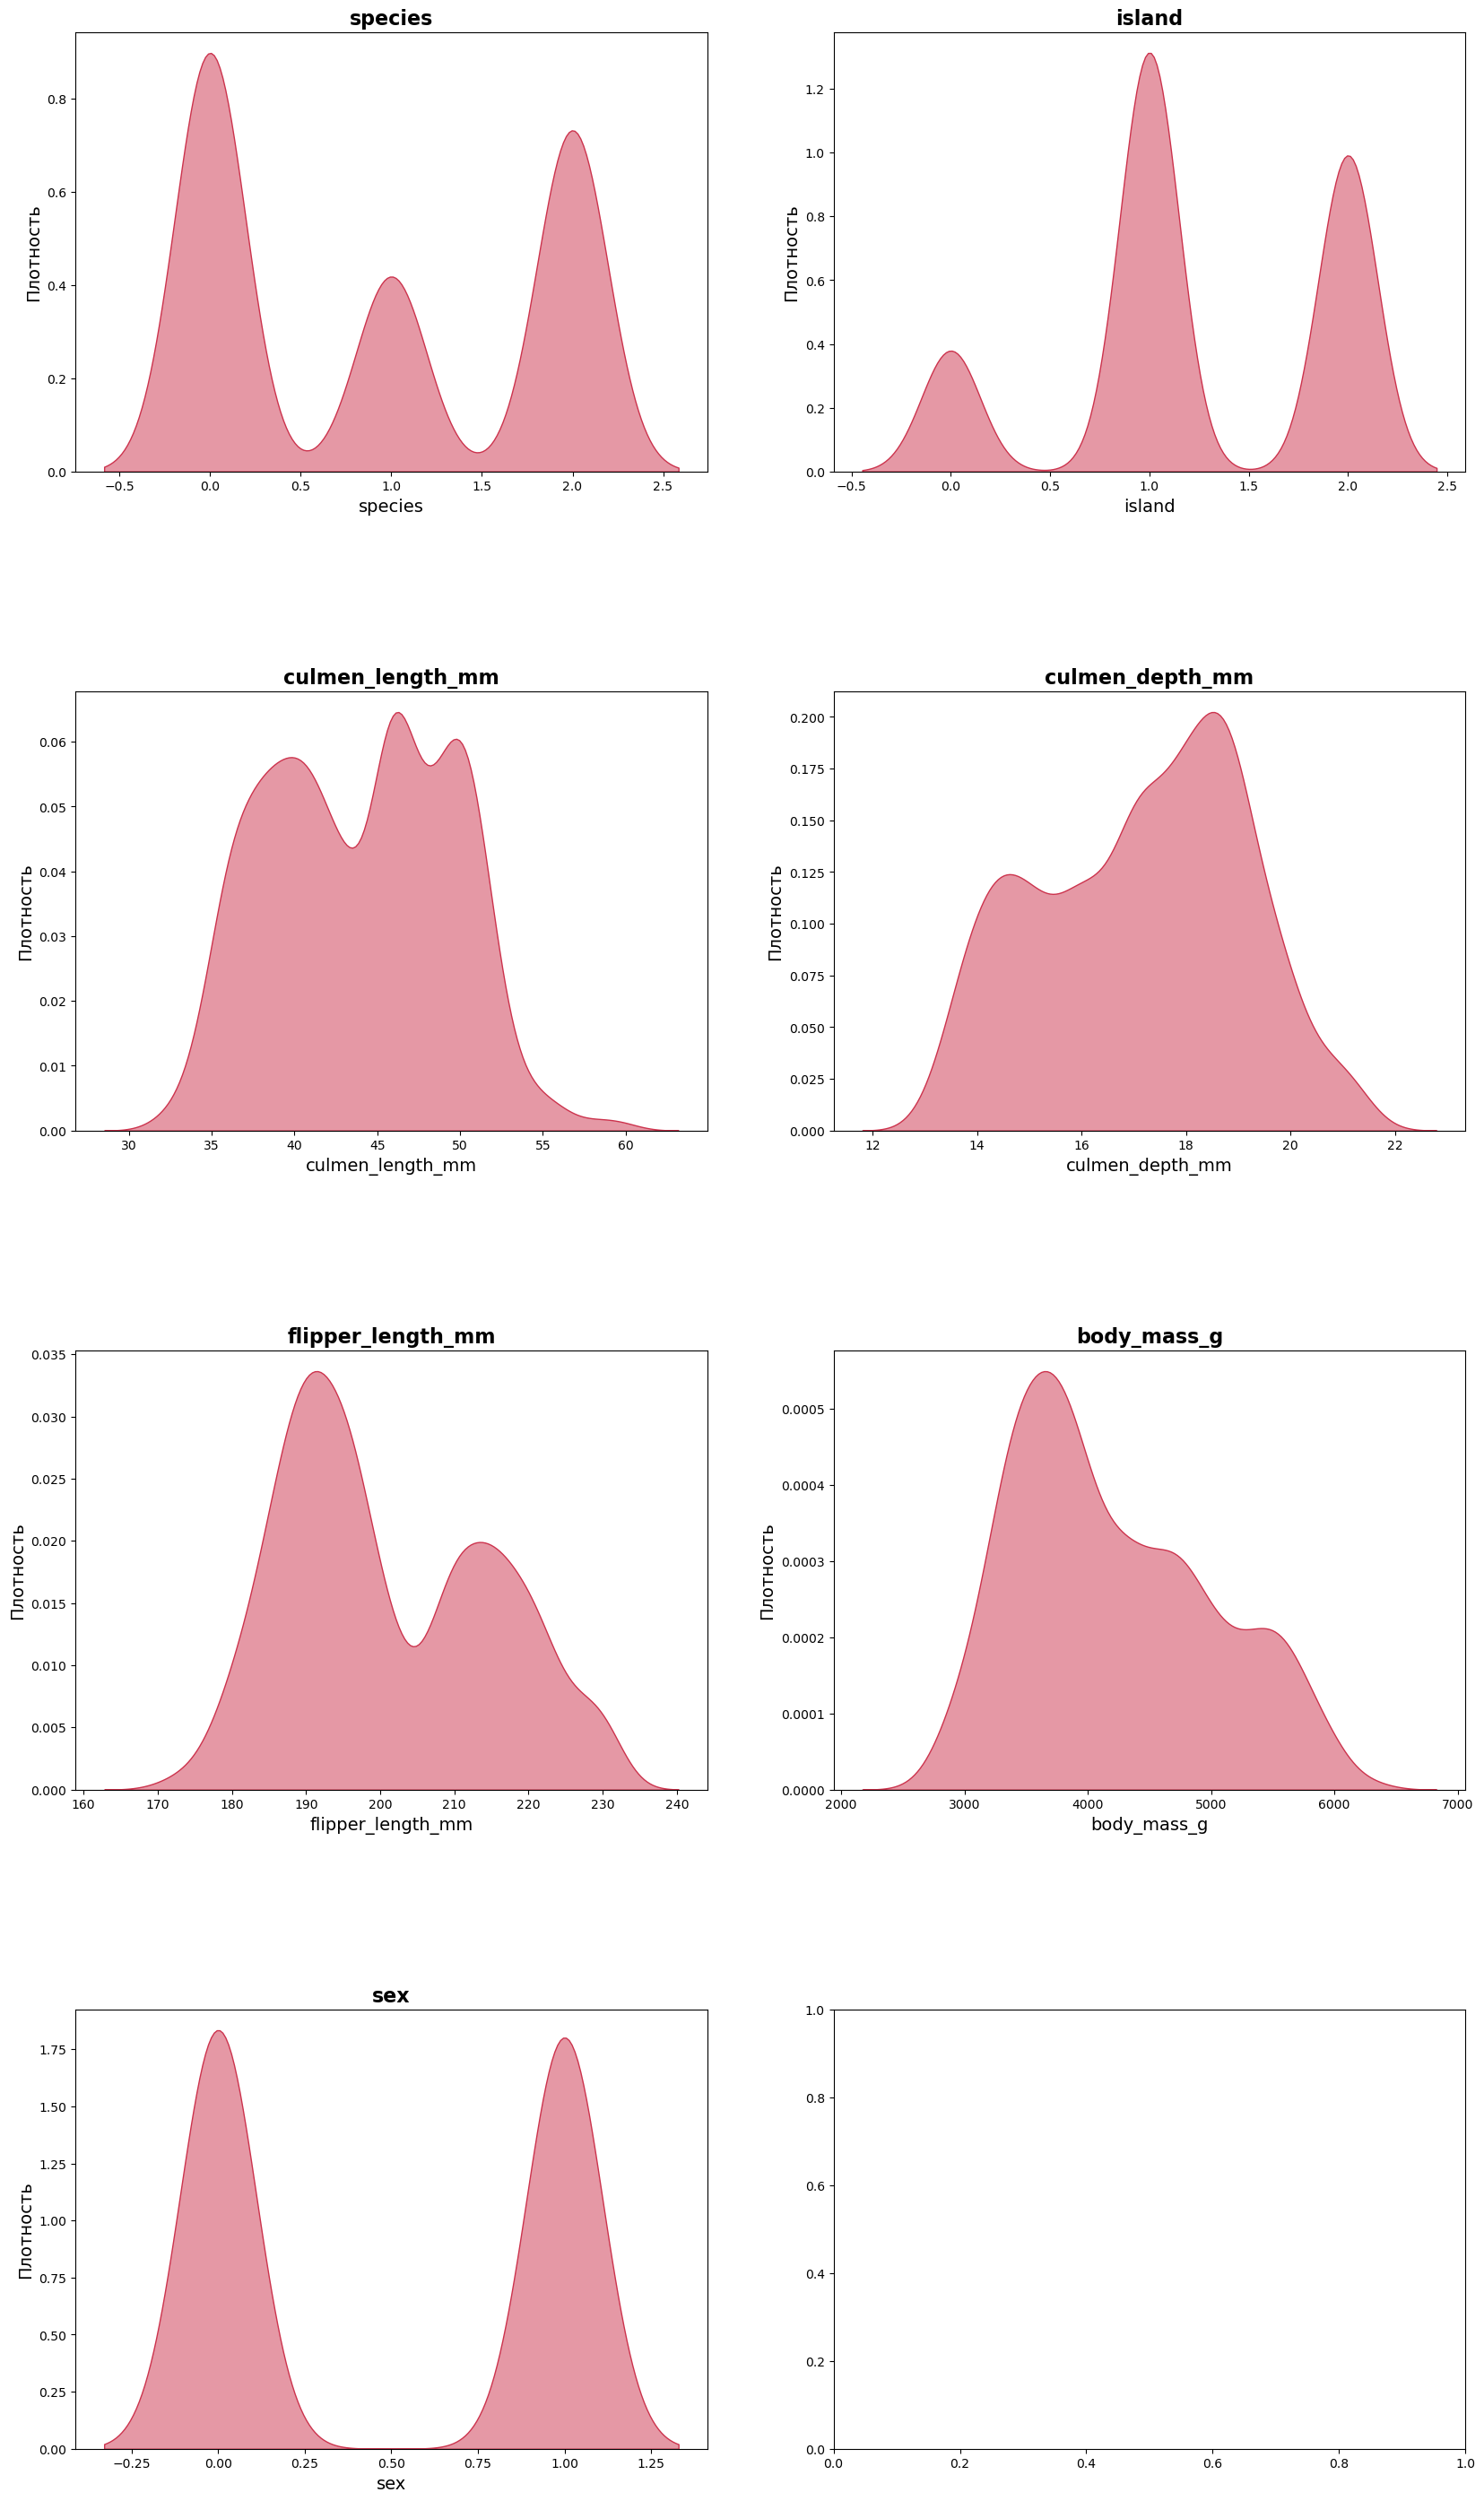

In [1075]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(4,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = hitmap_dataset.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = hitmap_dataset,
                x = column,
                fill = True,
                alpha = 0.5,
                bw_adjust=.7,
                color = [0.8, 0.2, 0.3],
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

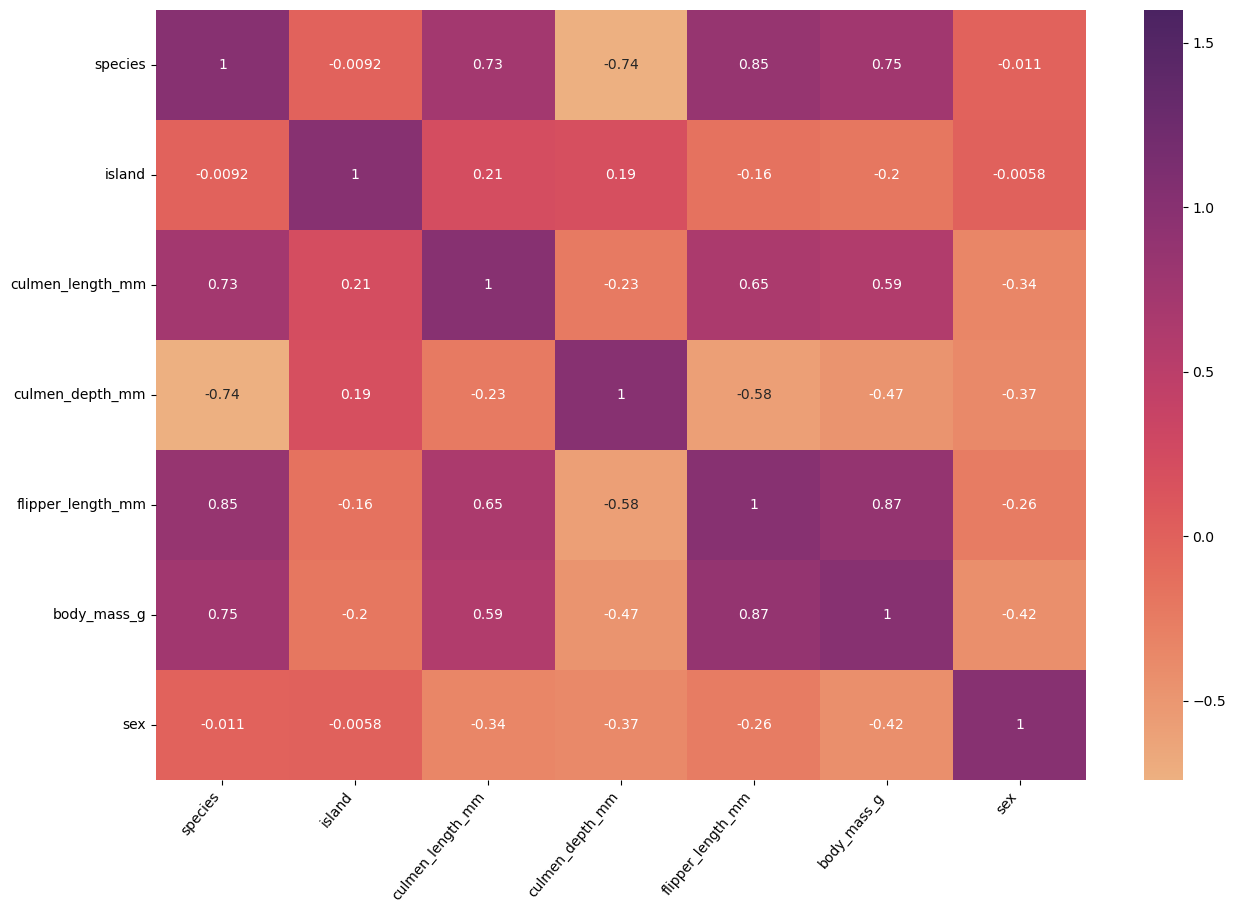

In [1076]:
plt.figure(figsize = (15,10))
sns.heatmap(hitmap_dataset.corr(),cmap = sns.color_palette("flare", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');

#### Промежуточный вывод
На тепловой карте виднеется несколько зависимостей: 

Между:
- species и culmen_length_mm
- species и flipper_length_mm
- species и body_mass_g
- culmen_length_mm и flipper_length_mm
- culmen_length_mm и body_mass_g
- flipper_length_mm и body_mass_g

## Метод главных компонет

In [1079]:
e = dataset.copy()
e = dataset.iloc[:, 2:]
e

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
3,36.7,19.3,193.0,3450.0,1.0
4,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,1.0
329,46.8,14.3,215.0,4850.0,1.0
330,50.4,15.7,222.0,5750.0,0.0
331,45.2,14.8,212.0,5200.0,1.0


In [1080]:
#X=dataset
X=e
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
3,36.7,19.3,193.0,3450.0,1.0
4,39.3,20.6,190.0,3650.0,0.0


In [1081]:
def TSNEplot(pred=None):    
    tsne = TSNE(random_state=1)

    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 10))
    plt.scatter(X_tsne[:, 0], 
                X_tsne[:, 1], 
                c = pred, 
                edgecolor="none", 
                alpha=0.7, s=40,
        cmap=plt.cm.get_cmap("flare", 3))

    plt.colorbar()
    plt.title("t-SNE projection");

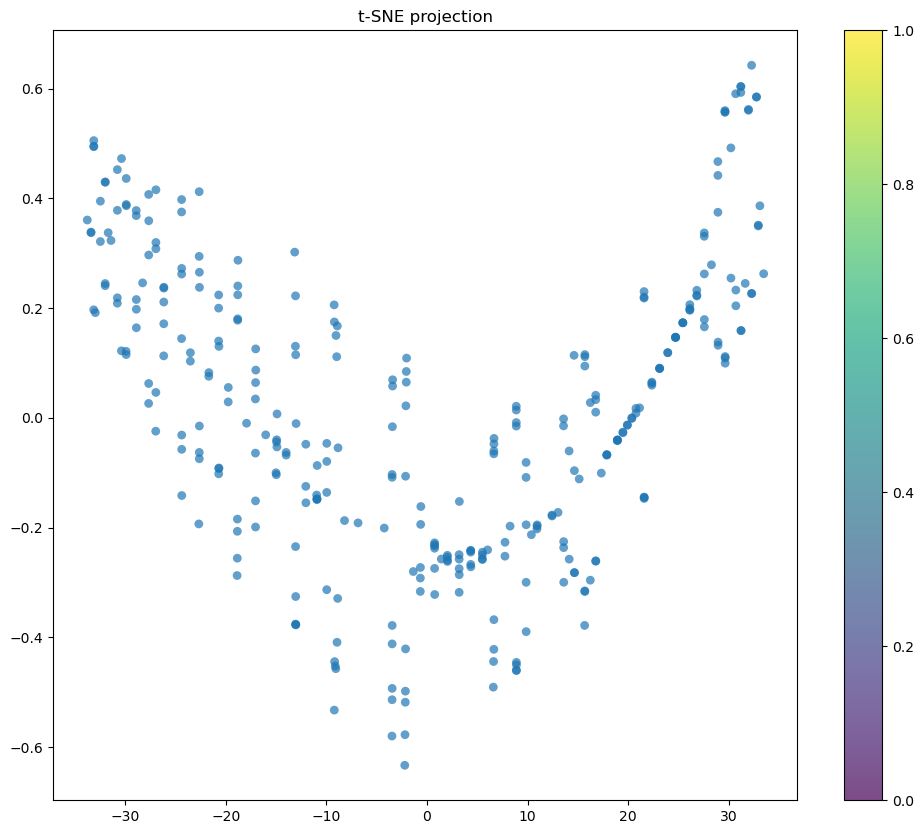

In [1083]:
TSNEplot()

In [1084]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

In [1086]:
PCAplot3D(X)

# Выбор метода кластеризации

## K-Means

In [1092]:
pca = PCA(n_components=3)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.fit_predict(X)
labels=kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=3).fit_transform(X))

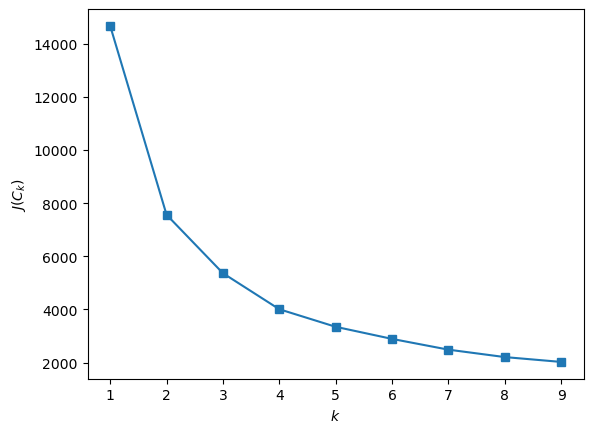

In [1093]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 10), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

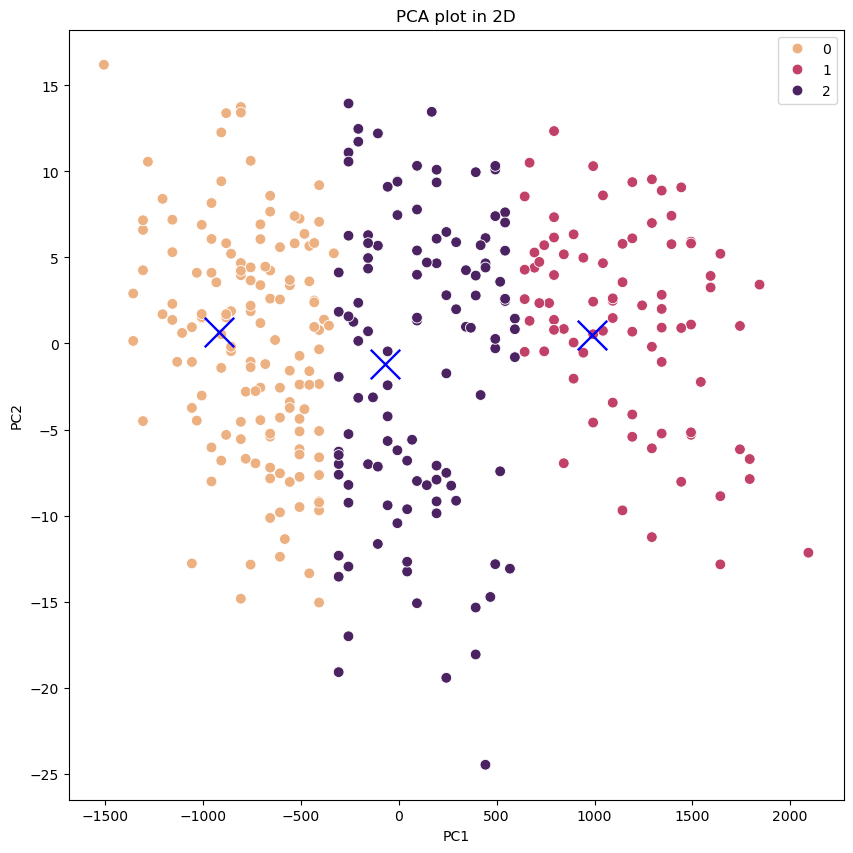

In [1094]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

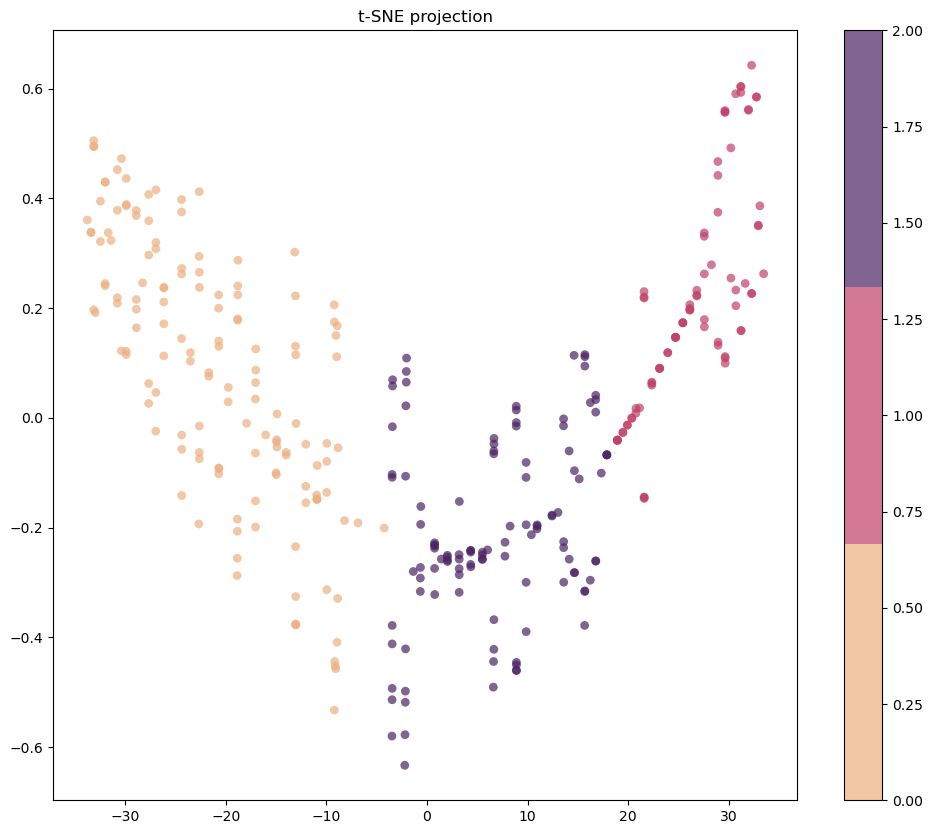

In [1095]:
TSNEplot(pred_k)

In [1096]:
PCAplot3D(X, pred_k)

## Agglomerative Clustering by Ward

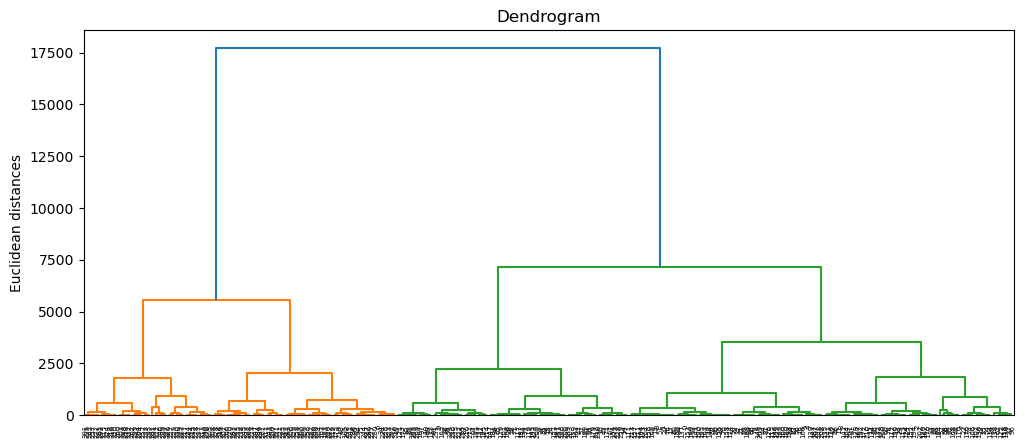

In [1098]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [1099]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

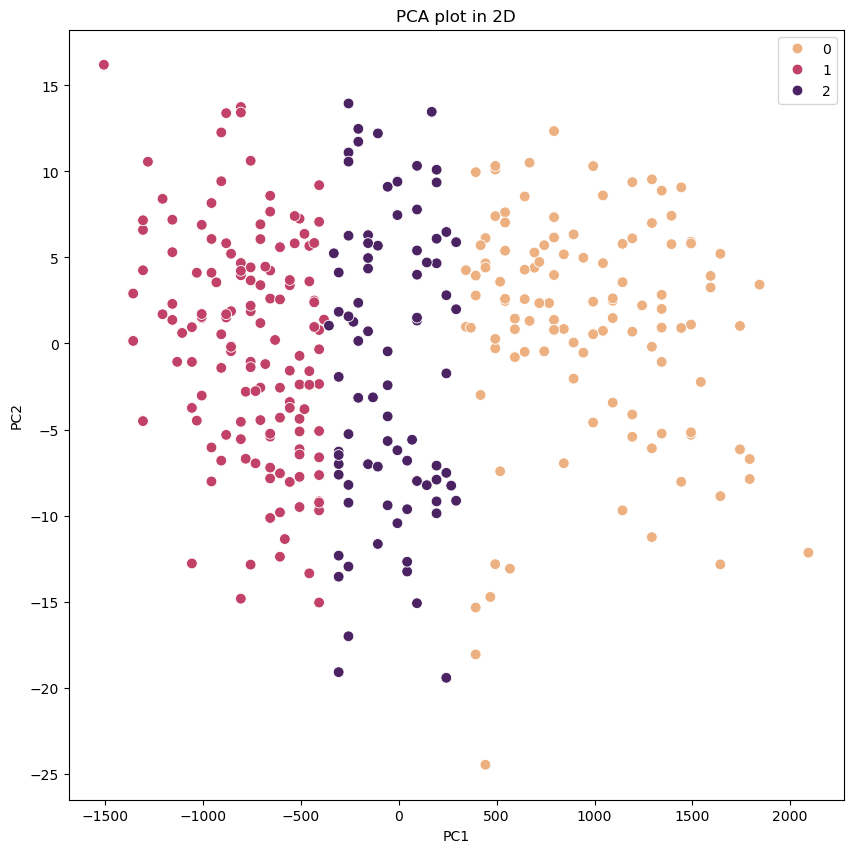

In [1100]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

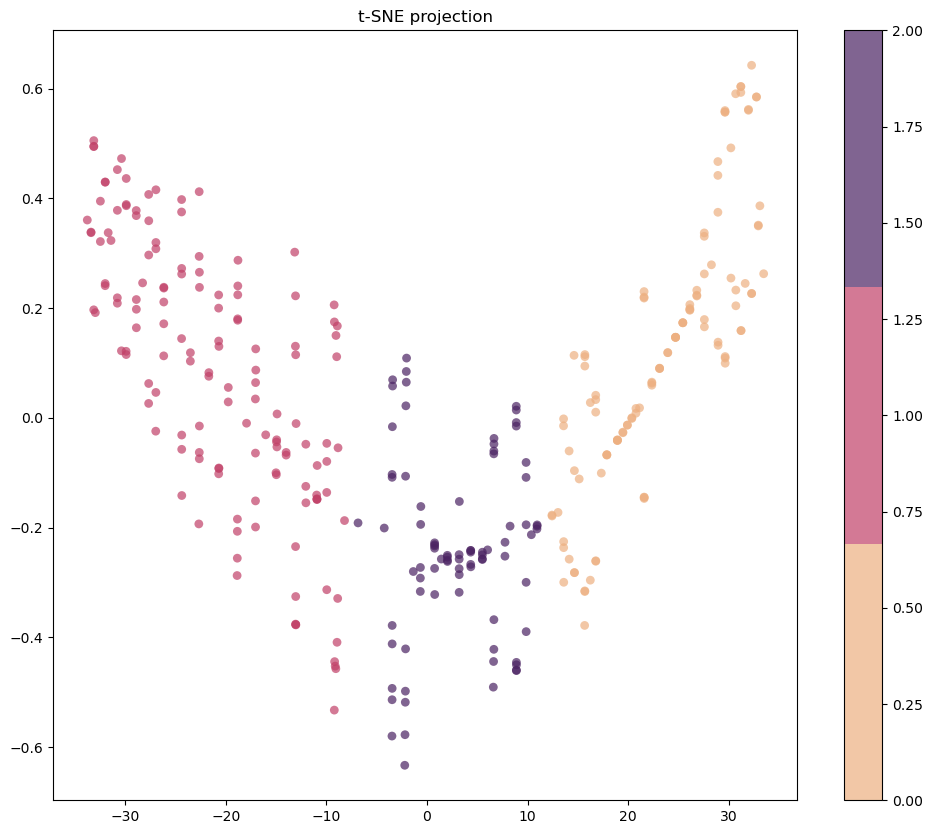

In [1103]:
TSNEplot(pred_ward)

In [1105]:
PCAplot3D(X, pred_ward)

## Spectral Clustering

In [1109]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

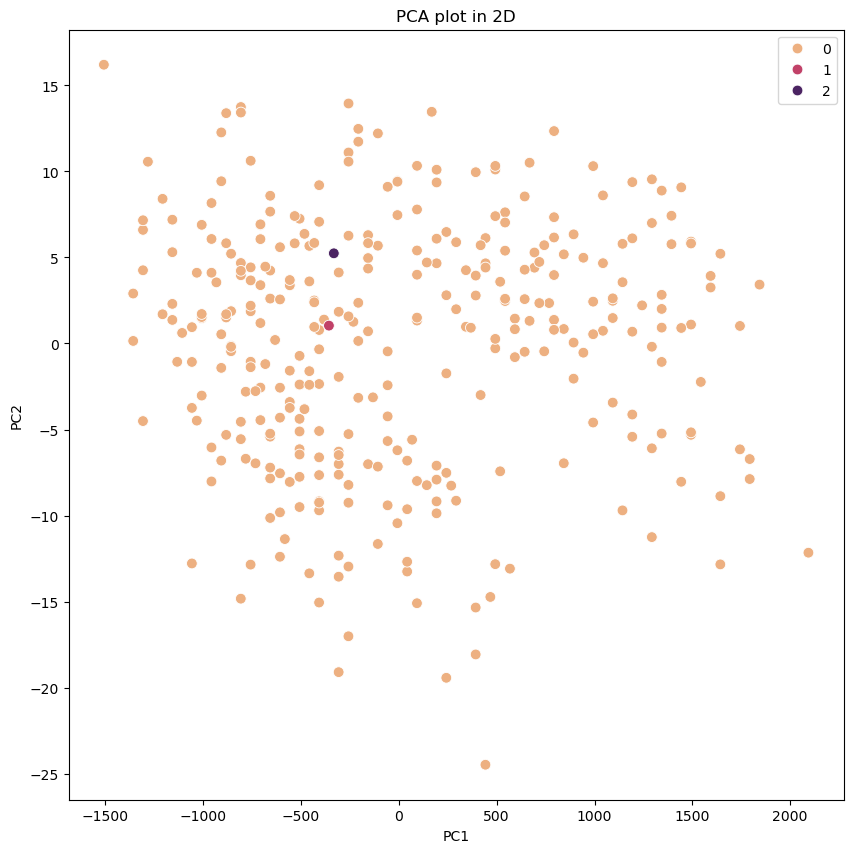

In [1110]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

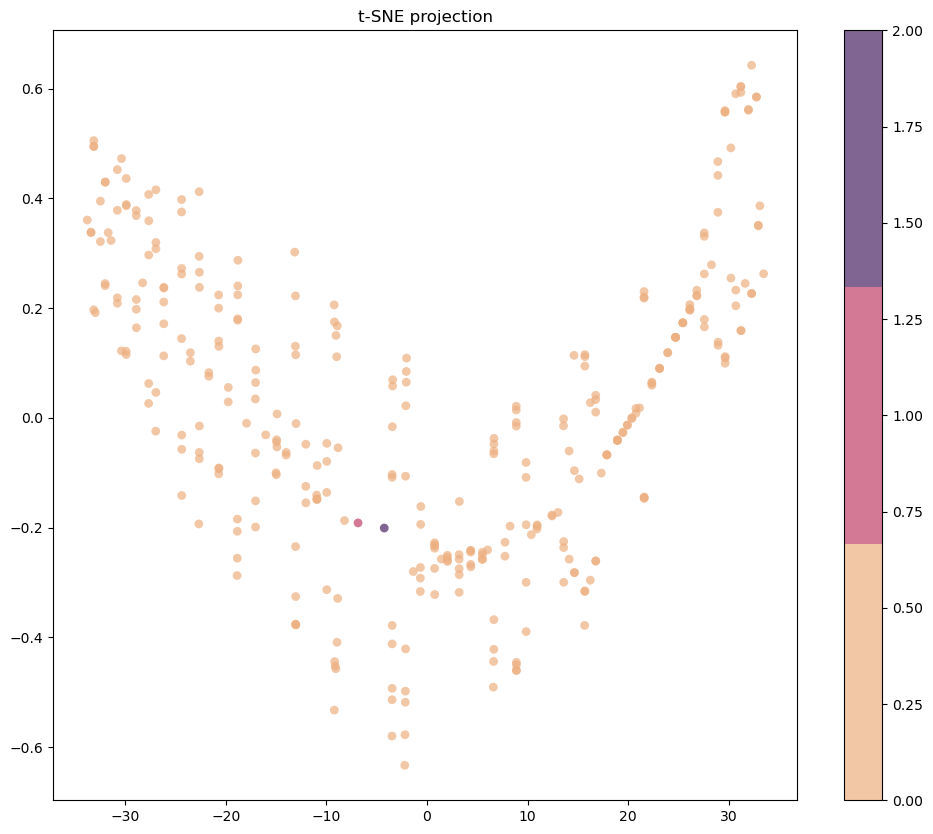

In [1111]:
TSNEplot(pred_sp)

In [1112]:
PCAplot3D(X, pred_sp)

### Точность ответов

In [1115]:
y = dataset.iloc[:, 0]
# y = df.iloc[:, 0]

rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 333 предсказано верно \n\n\n".format(rs_k, rs_k * 333))


print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 333 предсказано верно \n\n\n".format(rs_ward, rs_ward * 333))


print('Spectral Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 333 предсказано верно \n".format(rs_sp, rs_sp * 333))


K-Means
_____________________________________________

 rand_score = 0.6561742465356923 

 218.50602409638554 из 333 предсказано верно 



Agglomerative Clustering
_____________________________________________

 rand_score = 0.7261116538224972 

 241.79518072289156 из 333 предсказано верно 



Spectral Clustering
_____________________________________________

 rand_score = 0.36403270740620136 

 121.22289156626505 из 333 предсказано верно 



### Промежуточный вывод
Было построено и обучено 3 модели кластеризации: 

- K-Means
- Agglomerative Clustering
- Spectral Clustering

Большую точность ответов показала Agglomerative Clustering. Используем кластеризацию данной модели для обучения моделей классификации.

In [1117]:
dataset['cluster'] = pd.Series(pred_ward)
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,0,0,39.1,18.7,181.0,3750.0,0.0,1
1,0,0,39.5,17.4,186.0,3800.0,1.0,1
2,0,0,40.3,18.0,195.0,3250.0,1.0,1
3,0,0,36.7,19.3,193.0,3450.0,1.0,1
4,0,0,39.3,20.6,190.0,3650.0,0.0,1


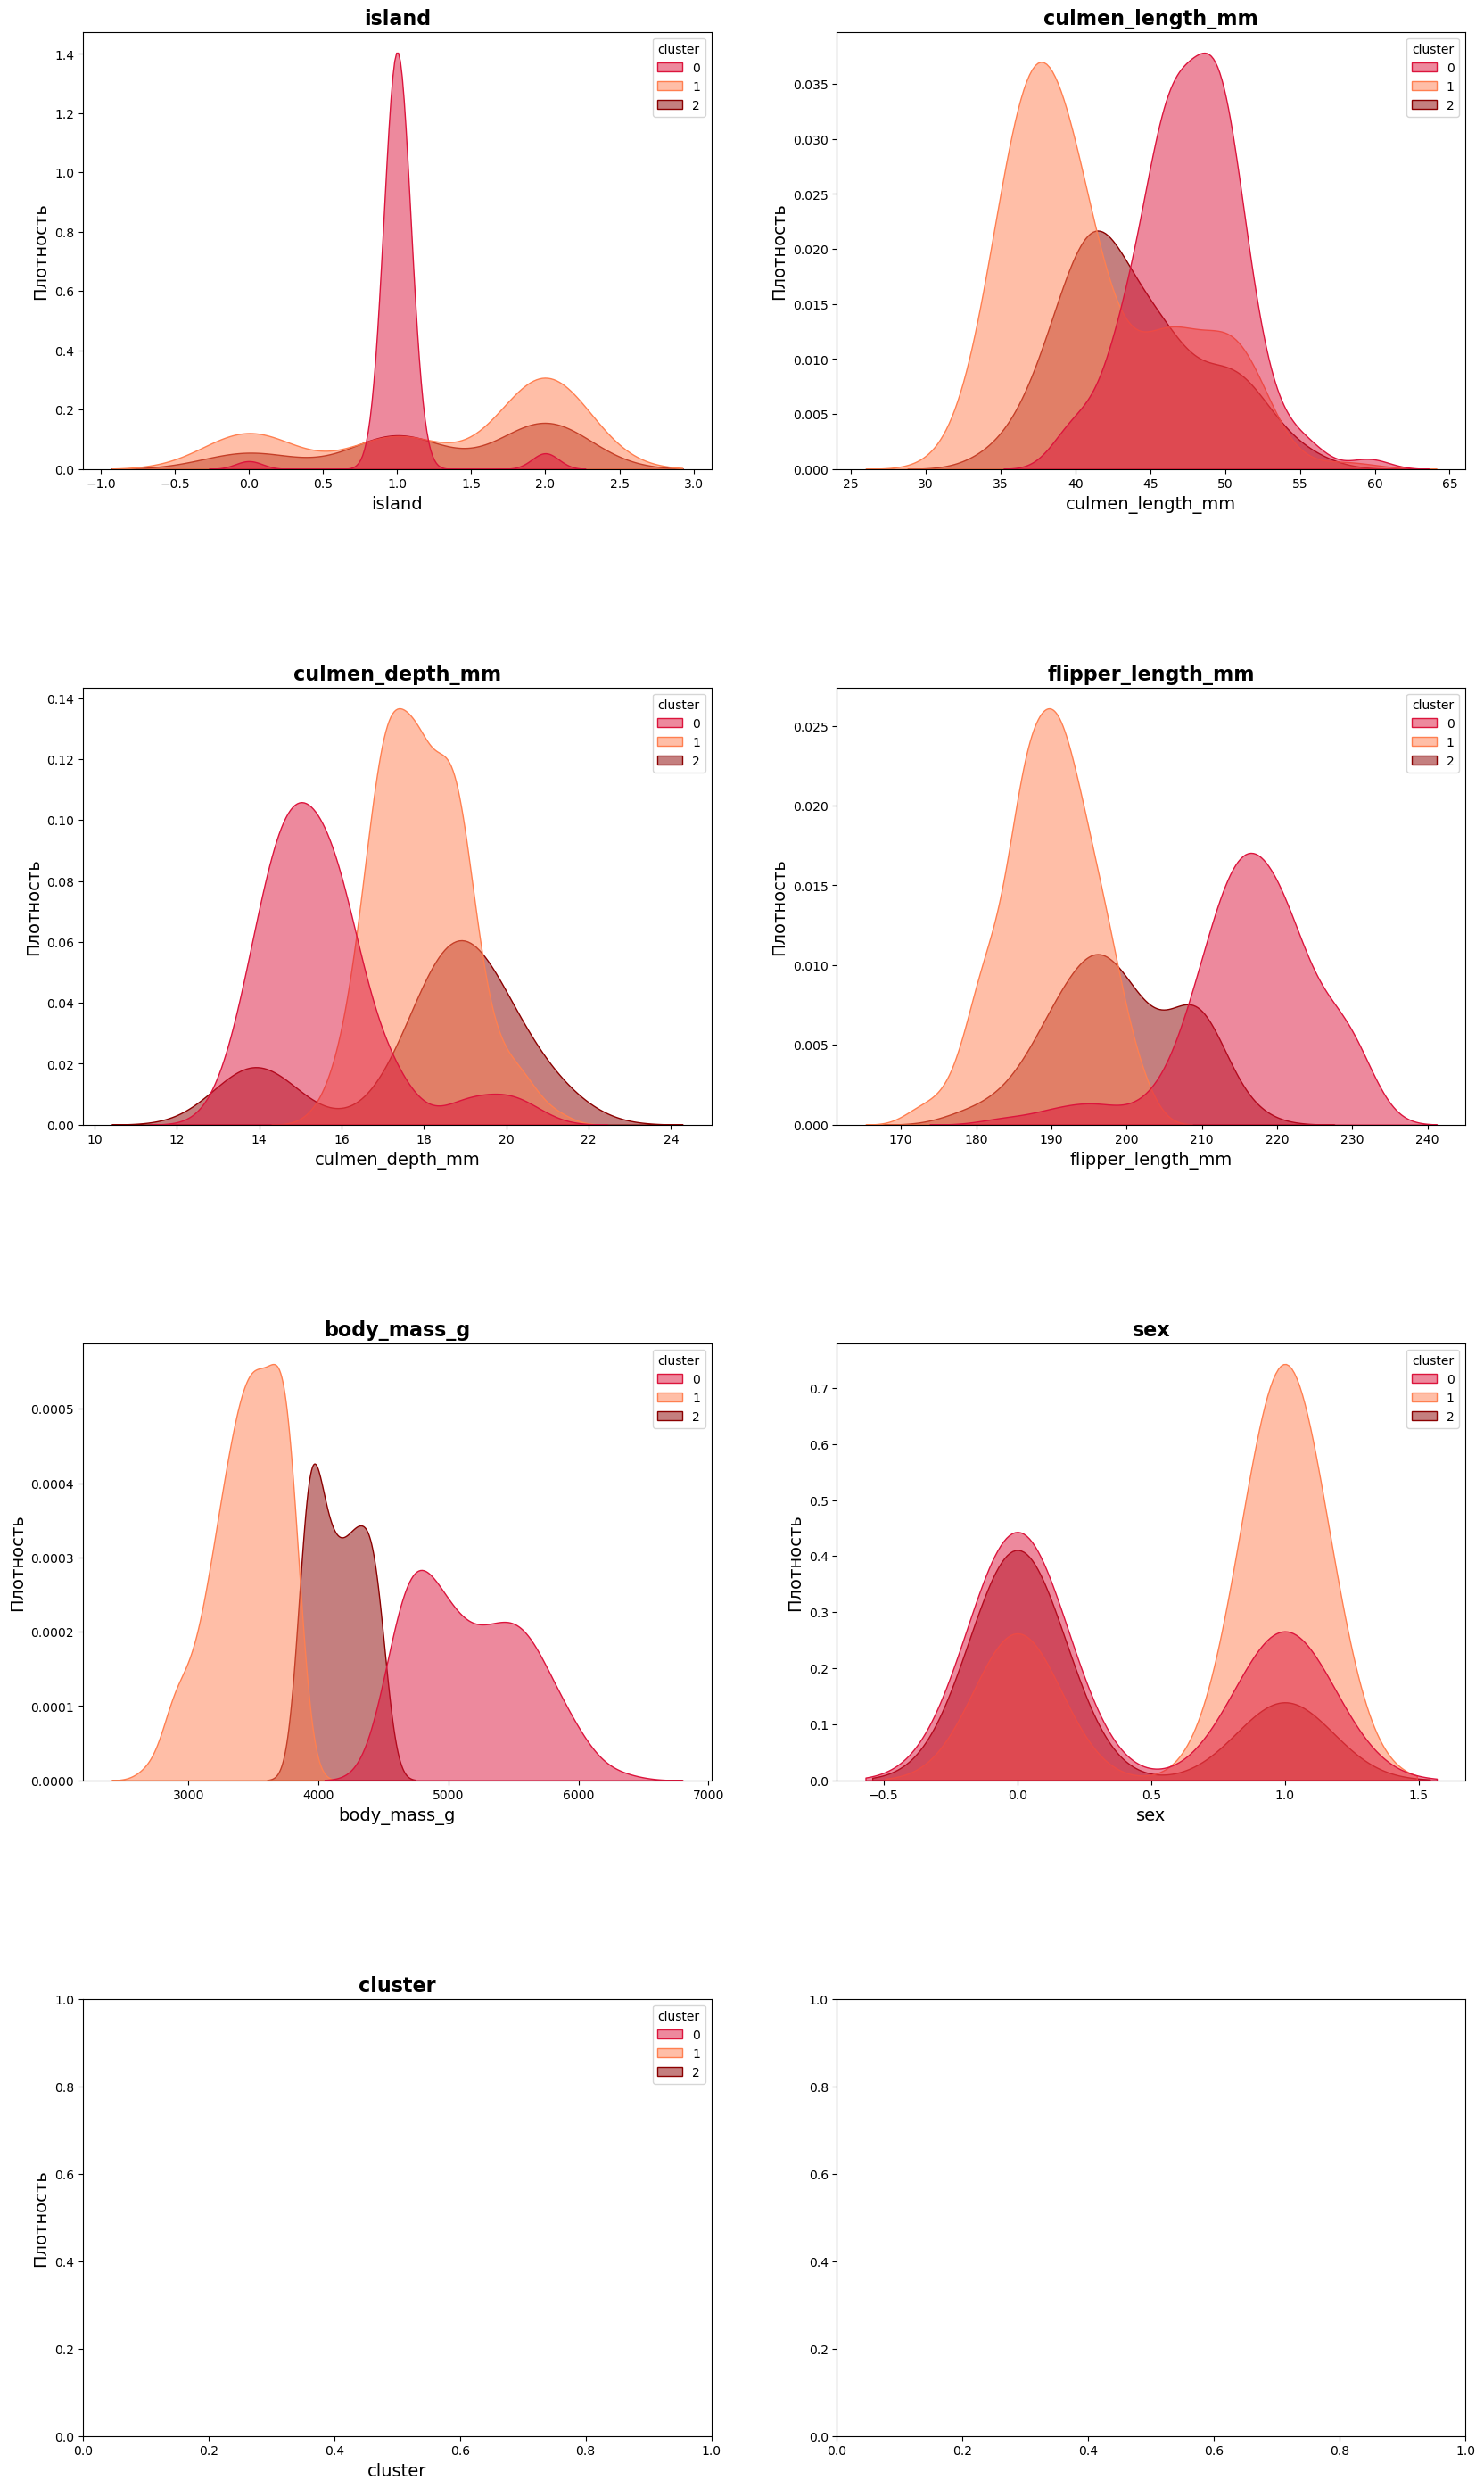

In [1118]:
# Создаем матривцу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(4,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = dataset.columns[1:]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = dataset,
                palette = ['#DC143C','#FF7F50','#8B0000'],
                x = column,
                fill = True,
                alpha = 0.5,
                hue = 'cluster',
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

# Классификация

## Обучение моделей

In [1121]:
# подготовка данных для обучения моделей
dataset.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'cluster'],
      dtype='object')

In [1122]:
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,0,0,39.1,18.7,181.0,3750.0,0.0,1
1,0,0,39.5,17.4,186.0,3800.0,1.0,1
2,0,0,40.3,18.0,195.0,3250.0,1.0,1
3,0,0,36.7,19.3,193.0,3450.0,1.0,1
4,0,0,39.3,20.6,190.0,3650.0,0.0,1
...,...,...,...,...,...,...,...,...
328,2,1,47.2,13.7,214.0,4925.0,1.0,0
329,2,1,46.8,14.3,215.0,4850.0,1.0,0
330,2,1,50.4,15.7,222.0,5750.0,0.0,0
331,2,1,45.2,14.8,212.0,5200.0,1.0,0


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.87      0.92      0.89        50
           2       0.55      0.50      0.52        24

    accuracy                           0.79       110
   macro avg       0.75      0.74      0.74       110
weighted avg       0.78      0.79      0.79       110



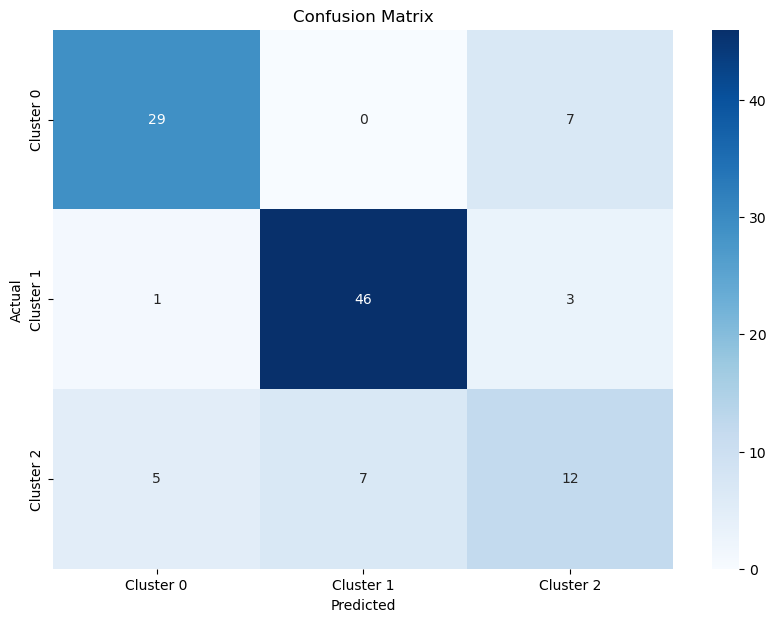

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [1123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(dataset[['species', 'island', 'flipper_length_mm', 'sex', ]],
                                                    dataset['cluster'],
                                                    test_size=0.33,
                                                    random_state=19)

# Инициализация и обучение модели RandomForest
rfc = RandomForestClassifier(criterion='gini',
                             n_estimators=100,
                             max_depth=9,
                             random_state=42,
                             n_jobs=-1)

# Обучение модели
rfc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rfc.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Построение матрицы ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Визуализация предсказаний кластеров
plt.figure(figsize=(12, 8))



#### Support Vector Classifier (SVC)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.94      0.88      0.91        50
           2       0.63      0.71      0.67        24

    accuracy                           0.85       110
   macro avg       0.82      0.83      0.82       110
weighted avg       0.85      0.85      0.85       110



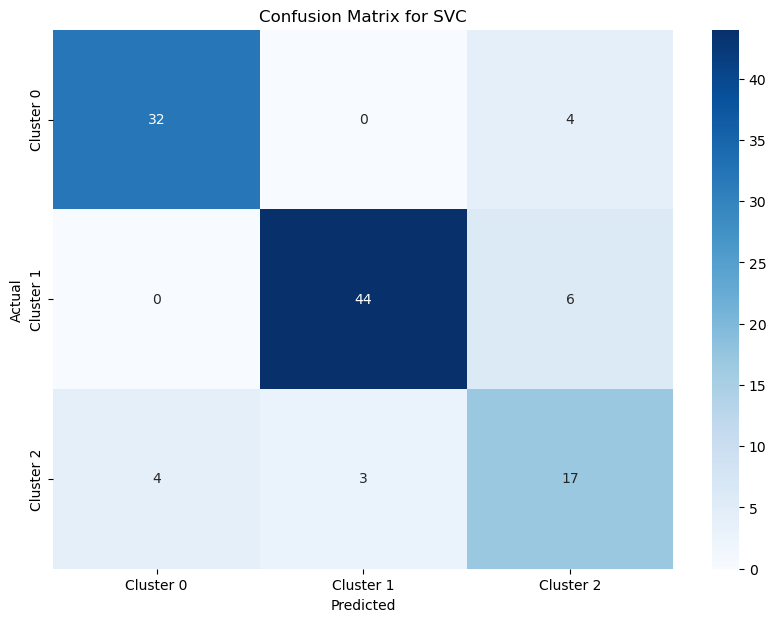

In [1127]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Импорт SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Предполагается, что df уже загружен

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(dataset[['species', 'island', 'flipper_length_mm', 'sex', ]],
                                                    dataset['cluster'],
                                                    test_size=0.33,
                                                    random_state=19)

# Инициализация и обучение модели SVC
svc = SVC(kernel='linear', random_state=42)  # Можно попробовать разные ядра, например, 'linear', 'rbf', 'poly'
svc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = svc.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Построение матрицы ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Gaussian Naive Bayes

Gaussian Naive Bayes Accuracy: 0.86
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.88      1.00      0.93        50
           2       0.76      0.54      0.63        24

    accuracy                           0.86       110
   macro avg       0.84      0.81      0.82       110
weighted avg       0.86      0.86      0.85       110



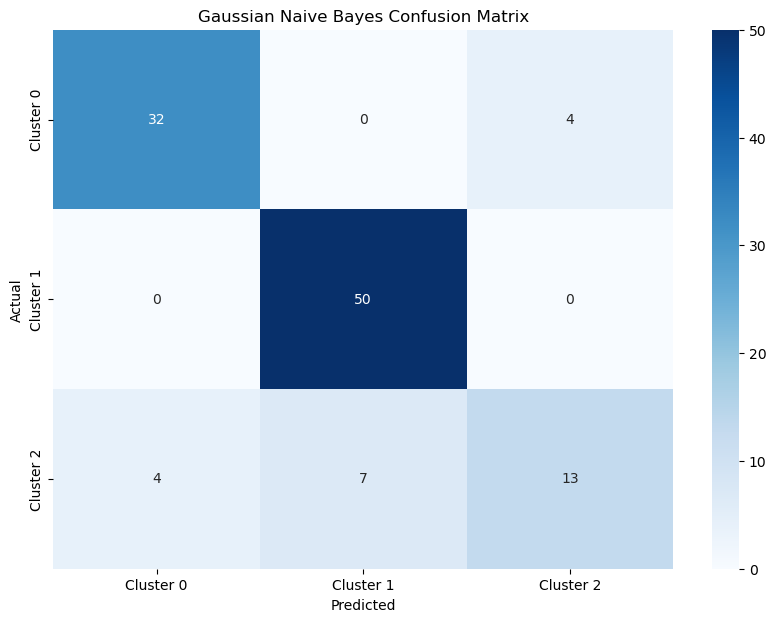

In [1129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

dataset = pd.get_dummies(dataset, columns=['species', 'island', 'sex'], drop_first=True)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('cluster', axis=1),  # Оставляем все столбцы, кроме 'cluster' в X
    dataset['cluster'],                 # Используем 'cluster' как y
    test_size=0.33,
    random_state=19
)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_gnb = gnb.predict(X_test)

# Оценка производительности модели
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}')

# Classification Report
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))

# Построение матрицы ошибок (confusion matrix)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



## Вывод

### В результате, можно сделать вывод, что Gaussian Naive Bayes является наиболее подходящей моделью для данной классификационной задачи,
### обеспечивая высокую точность и надежность при предсказаниях. Рекомендуется использовать ее для дальнейшей обработки и анализа данных,
### а также в практических приложениях, где необходима быстрая и эффективная классификация.